In [1]:
from IPython.display import display, Math, Latex

# Libraries you might need 
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
from scipy.stats import poisson, norm

__1.Show that E [(s−c)2] = (c−E[s])2 + Var[s]__.

$
\begin{align*}
Var[s] &= \mathbb{E}[(s-\mu_s)^2] \\
&= \mathbb{E}[s^2]-\mathbb{E}[2 \mu_s s]+ \mathbb{E}[\mu_s^2]\\
&= \mathbb{E}[s^2]-2\mu_s\mathbb{E}[s]+\mu_s^2\\
&= \mathbb{E}[s^2]-2\mu_s^2 + \mu_s^2\\
&= \mathbb{E}[s^2]-\mu_s^2\\
&= \mathbb{E}[s^2]-(\mathbb{E}[s])^2
\end{align*}
$

$
\begin{align*}
(c-\mathbb{E}[s])^2+Var[s]&= c^2-2c\mathbb{E}[s]+(\mathbb{E}[s])^2+\mathbb{E}[s^2]-(\mathbb{E}[s])^2\\
&= c^2-2c\mathbb{E}[s]+\mathbb{E}[s^2]\\
&= \mathbb{E}[s^2-2cs+c^2] =\mathbb{E}[(s-c)^2]
\end{align*}
$


__2. Let X ∼ Poisson($\lambda$).   
(a) Show that Var[X] = $\lambda$__.

$
\begin{align*}
\text{Poisson distribution:} \,
\Pr \, ( X=x ) = \frac{\lambda^x e^{-\lambda}}{x!} \quad (\text{for } \, x=0,1,2,...)\\
\end{align*}
$

$
\begin{align*}
Var[X] &= \mathbb{E} \Big[ \big( X - \mathbb{E}[X] \big)^2 \Big]\\
&= \mathbb{E}[X^2] - \big( \mathbb{E}[X] \big)^2
\end{align*}
$

$
\begin{align*}
\mathbb{E}[X(X-1)] &= \sum_{x=0}^{\infty} x(x-1) \frac{\lambda^x e^{-\lambda}}{x!}\\
&= e^{-\lambda} \sum_{x=2}^{\infty} x(x-1) \frac{\lambda^x}{x!}\\
&= \lambda^2 e^{-\lambda} \sum_{x=2}^{\infty} \frac{\lambda^{x-2}}{(x-2)!}\\
&= \lambda^2 e^{-\lambda} \sum_{x=0}^{\infty} \frac{\lambda^x}{x!}
\quad \big( \text{Taylor Series for } e^x \, \text{at } a=0, e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!}  \big)\\
&= \lambda^2 e^{-\lambda} e^{\lambda} = \lambda^2
\end{align*}
$

$
\begin{align*}
\mathbb{E}[X(X-1)]=\mathbb{E}[X^2]-\mathbb{E}[X]
\end{align*}
$

$
\begin{align*}
\Rightarrow \mathbb{E}[X^2] = \lambda^2 + \lambda 
\end{align*}
$

$
\begin{align*}
Var[X] &= \mathbb{E}[X^2] - \big( \mathbb{E}[X] \big)^2\\
&=\lambda^2 + \lambda -\lambda^2 = \lambda
\end{align*}
$

__(b) Plot in Python the p.m.f. of X for $\lambda \in$  1,3,5,50. What do you observe about the shape of the p.m.f. as $\lambda$ grows?__

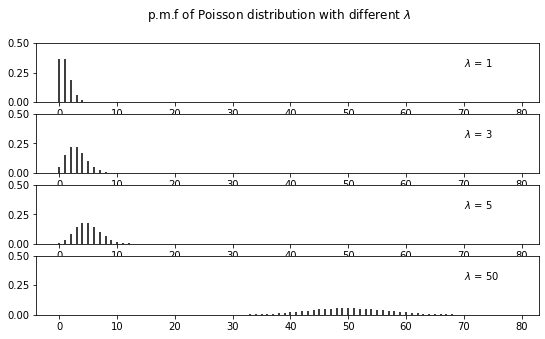

In [2]:
x = np.arange(0,80,1)
lambdas = [1,3,5,50]
plt.figure(figsize=(9,5)) 
for i in range(len(lambdas)):
    plt.subplot(4,1,i+1)
    plt.vlines(x,np.zeros(len(x)),poisson.pmf(x,lambdas[i]))
    plt.text(70,0.3,f'$\lambda$ = ${lambdas[i]}$')
    plt.ylim([0,0.5])
plt.suptitle(r'p.m.f of Poisson distribution with different $\lambda$')
plt.show()

__Mean of X ~ Pois($\lambda$) is $\lambda$, so the center of p.m.f shift to the right as $\lambda$ grows. Also, the shape of p.m.f get flatenned with larger $\lambda$.__

__(c) What are the parameters of the best matching Normal distribution for a given Poisson distribution with parameter $\lambda$? No formal derivation is required here, use your intuition and verify by plotting (for the same values of $\lambda$ as above).__

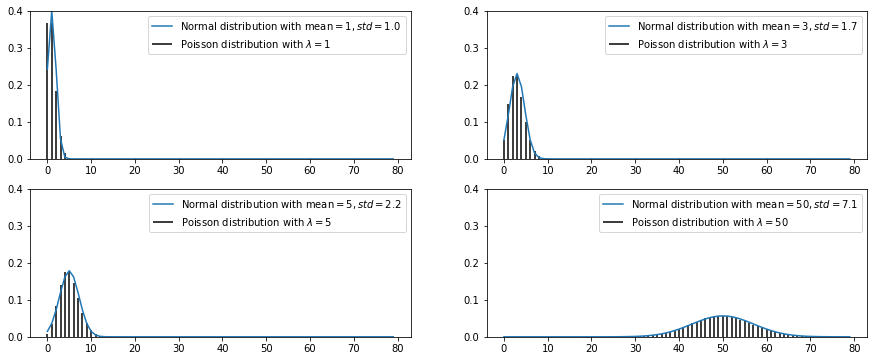

In [3]:
x = np.arange(0,80,1)
lambdas = [1,3,5,50]
plt.figure(figsize=(15,6)) 
scales = np.sqrt(lambdas)
scale_legend = np.round(scales,1)
for i in range(len(lambdas)):
    plt.subplot(2,2,i+1)
    plt.vlines(x,np.zeros(len(x)),poisson.pmf(x,lambdas[i]),label=f'Poisson distribution with $\lambda={lambdas[i]}$')
    plt.plot(x,norm.pdf(x,loc=lambdas[i],scale=scales[i]),label=f'Normal distribution with mean$={lambdas[i]},std={scale_legend[i]}$')
    plt.ylim([0,0.4])
    plt.legend()
plt.show()

__3. Compute the Fisher Information $J_s$ for a Bernouilli neuron with arbitrary tuning curve $f(s)$<br>
i.e.$\quad p(r | f(s)) = f(s)^r(1−f(s))^{1−r}, r ∈{0,1}$__ 

$
\begin{align*}
J(f(s)) &= -\mathbb{E}_r \big[\big( \frac{\partial^2}{\partial^2 f(s)} \, \ln P(r|f(s)) \big) \, \big| \, f(s)\big]
\end{align*}
$

$
\begin{align*}
\frac{\partial}{\partial f(s)} \, \ln P(r|f(s)) &= \frac{\partial}{\partial f(s)} \, \ln f(s)^r (1-f(s))^{1-r}\\
&= \frac{\partial}{\partial f(s)} \,\big( r\ln f(s) + (1-r)\ln (1-f(s)) \big)\\
&= \frac{r}{f(s)} - \frac{1-r}{1-f(s)}\\
\end{align*}
$

$
\begin{align*}
\frac{\partial^2}{\partial^2 f(s)} \, \ln P(r|f(s)) 
&=  \frac{\partial}{\partial f(s)} \, \big( \frac{r}{f(s)} - \frac{1-r}{1-f(s)} \big)\\
&= -\frac{r}{f^2(s)}-\frac{1-r}{(1-f(s))^2}
\end{align*}
$

$
\begin{align*}
J(f(s)) &= -\mathbb{E}_r \big[\big( \frac{\partial^2}{\partial^2 f(s)} \, \ln P(r|f(s)) \big) \, \big| \, f(s)\big]\\
&=-\mathbb{E}_r \big[ -\frac{r}{f^2(s)}-\frac{1-r}{(1-f(s))^2} \, \big| \, f(s)\big]\\
&=\frac{\mathbb{E}[r]}{f^2(s)}+\frac{1-\mathbb{E}[r]}{(1-f(s))^2} 
\quad ,\text{For bernoulli distribution }\mathbb{E}[r] = f(s)\\
&=\frac{1}{f(s)}+\frac{1}{1-f(s)}\\
&=\frac{1}{f(s)(1-f(s))}
\end{align*}
$

$
\text{}
\text{Use the theorem on slide 13, we get:}\\
J(s) = (f'(s))^2 \, \frac{1}{f(s)(1-f(s))}
$

__4.∗ Let the rate of the homogeneous Poisson process $\mu$ be drawn randomly from the Gamma distribution with parameters $\alpha$ = m $\in \mathbb{N}$ and $\beta$. Density of the Gamma distribution is given by
$\normalsize \rho(\mu) = g(\mu|\alpha,\beta) =\frac{\mu^{\alpha-1} \, e^{-\beta\mu}}{\beta^{-\alpha}\, \Gamma(\alpha)}$<br>
Show that the spike count distribution $\normalsize P(k)=\int_0^\infty \! \mathcal{P}_{Poisson}(k|\mu) \rho(\mu) \, \mathrm{d}\mu$
obtained from marginalization over the parameter µ is a negative binomial distribution.<br><br>
Hint:<br>$\normalsize 1=\int_0^\infty \! \frac{b^a}{\Gamma(a)}\theta^{a-1}e^{-b\theta} \, \mathrm{d}\theta \iff \int_0^\infty \! \theta^{a-1}e^{-b\theta} \, \mathrm{d}\theta=\frac{\Gamma(a)}{b^a}$__

$
\begin{align*}
P(k)&=\int_0^\infty \! \mathcal{P}_{Poisson}(k|\mu) \rho(\mu) \, \mathrm{d}\mu\\
&=\int_0^\infty \! \frac{\mu^k}{k!} \, e^{-\mu} \,
\frac{\mu^{\alpha-1} \, e^{-\beta\mu}}{\beta^{-\alpha} \, \Gamma(\alpha)} \, \mathrm{d}\mu\\
&=\frac{1}{k! \, \beta^{-m} \, \Gamma(m)} \int_0^\infty \! \mu^{k+m-1} \, e^{-\mu(1+\beta)} \, \mathrm{d}\mu
\quad\quad, \int_0^\infty \! \theta^{a-1}e^{-b\theta} \, \mathrm{d}\theta=\frac{\Gamma(a)}{b^a} 
\text{ with } a=k+m, b=1+\beta, \theta=\mu\\
&=\frac{1}{k! \, \beta^{-m} \, \Gamma(m)} \, \frac{\Gamma(k+m)}{(1+\beta)^{k+m}}
\quad\quad, \Gamma(n)=(n-1)!\\
&=\frac{(k+m-1)!}{k!(m-1)!} \, \frac{\beta^m}{(1+\beta)^m\, (1+\beta)^k}\\
&=\binom{k+m-1}{k}\, \big( \frac{\beta}{1+\beta} \big)^m \, \big( \frac{1}{1+\beta}\big)^k\\
&=\binom{k+m-1}{k}\, \big(1-\frac{1}{1+\beta} \big)^m \, \big( \frac{1}{1+\beta}\big)^k
\end{align*}
$

$
\begin{align*}
\therefore \text{The response } r=k \text{ is generated from the negative binomial distribution NB}(q,p) \text{ with } q=m, p =  \frac{1}{1+\beta}
\end{align*}
$